<a href="https://colab.research.google.com/github/jasonyang429/Classificiation-on-Parkinson-Disease-with-NN/blob/main/Classification_on_Parkinson_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification on Parkinson Disease**

The dataset of Parkinson Disease was cited from 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

The dataset consists of binary classes for classification purpose, where "0" denotes negative for Parkinson Disease and vice versa.

Look more about the details of the dataset [here](https://archive.ics.uci.edu/ml/datasets/Parkinsons).



<img src='https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg'>


First, import neccessary libraries.

In [491]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
%matplotlib inline
import pandas as pd
import csv
# Check tensforflow version
print(tf.__version__)

2.3.0


Here, I downloaded the data and read the data.

The "status" column denotes that whether the person is diagnosed with Parkinson Disease or not. "0" for negative and "1" for positive.

The "status" column is located at the 17th column, so I swaped the positions to make it simpler to split into X and Y.

In [492]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

flag = True
dataset = []
column_header = None

# Read the data
with open('parkinsons.data') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    if flag:
      flag = False
      column_header = row
    else:
      dataset.append(row)
# print the column header
print(column_header)
dataset = np.array(dataset)

# print the shape of the dataset
print(dataset.shape)

# Swapping the index
idx = []
for i in range(dataset.shape[1]):
   if i != 17: 
    idx.append(i)
idx.append(17)
dataset = dataset[:,idx]

print(dataset[:3])

np.random.seed(43)

--2020-10-12 08:12:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
(195, 24)
[['phon_R01_S01_1' '119.99200' '157.30200' '74.99700' '0.00784' '0.00007'
  '0.00370' '0.00554' '0.01109' '0.04374' '0.42600' '0.02182' '0.03130'
  '0.02971' '0.06545' '0.02211' '21.03300' '0.414783' '0.815285'
  '-4.813031' '0.266482' '2.301442' '0.284654' '1']
 ['phon_R01_S01_2' '12

Here, I shuffled the dataset and split it into X and Y.

In [493]:
np.random.shuffle(dataset)

X = np.array(dataset[:,1:-2]).astype(float)
Y = np.array(dataset[:,-1]).astype(float)
Y = np.expand_dims(Y, -1)

print(X.shape)
print(Y.shape)

(195, 21)
(195, 1)


Split the X and Y into training, validation and test sets.

In [494]:
test_split_idx = int(0.94*X.shape[0])
X, x_test = X[:test_split_idx], X[test_split_idx:]
Y, y_test = Y[:test_split_idx], Y[test_split_idx:]

val_split_idx = int(0.95*X.shape[0])
x_train, x_val = X[:val_split_idx], X[val_split_idx:]
y_train, y_val = Y[:val_split_idx], Y[val_split_idx:]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(173, 21) (173, 1)
(10, 21) (10, 1)
(12, 21) (12, 1)


Define the model. I used Neural Networks. 

The last layer of the network is activated by a sigmoid function for binary classification.

In [511]:
# L1 = 128
# L2 = 32
# L3 = 10
# optimizer = adam(lr=0.00006)
# batch_size = 4
# ~80% train acc, ~90% val acc
# 83% test acc

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_shape=[21]),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,829
Trainable params: 3,829
Non-trainable params: 0
_________________________________________________________________


Compile the model and fit it with the training sets and validate with validation sets.

In [512]:

tf.keras.backend.clear_session()
model.compile(optimizer=tf.keras.optimizers.Adam(0.0008), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,batch_size=4, epochs=150, validation_data=(x_val, y_val), verbose=0)

Plotting the accuracy and losses.

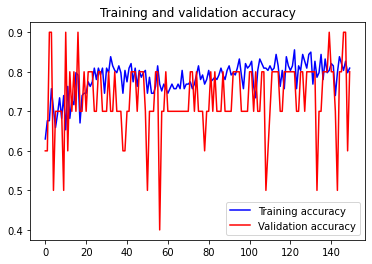

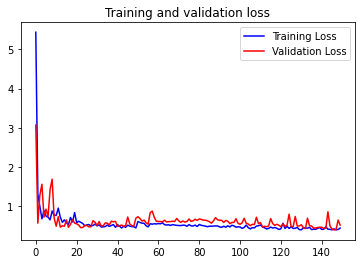

In [513]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the model on test set.

In [514]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8333


[0.43693771958351135, 0.8333333134651184]